# Lab: Fitting Regression Trees

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn import datasets, linear_model
import graphviz
import matplotlib.pyplot as plt
import math


In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
# The boston data set is spilt into training and test data for both X and y:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

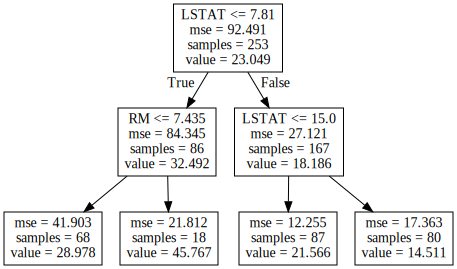

In [6]:
export_graphviz(regr_tree, out_file="832Tree.dot", feature_names=boston.feature_names)
with open("832Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
y_pred = regr_tree.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)

Mean squared error:  28.801544864457945


Text(0, 0.5, 'y_test')

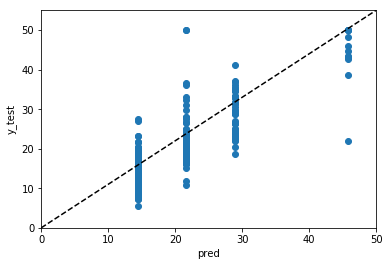

In [8]:
plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlim(0,50)
plt.ylim(0,55)
plt.xlabel('pred')
plt.ylabel('y_test')